In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
from scipy.optimize import zeros
df = pd.read_excel('5.VERİ SETİ (2).xlsx',index_col=[0], parse_dates=[0])
      
df


,OUP
DATE-TİME,
2016-06-17 06:00:00,11.606175
2016-06-17 07:00:00,68.981872
2016-06-17 08:00:00,258.166154
2016-06-17 09:00:00,469.024487
2016-06-17 10:00:00,653.203425
...,...
2017-08-08 15:00:00,877.020000
2017-08-08 16:00:00,731.880000
2017-08-08 17:00:00,459.750000


In [95]:
type(df)

pandas.core.frame.DataFrame

In [96]:
series_value = df.values
series_value

array([[ 11.606175  ],
       [ 68.98187179],
       [258.16615385],
       ...,
       [459.75      ],
       [104.49      ],
       [ 74.06221622]])

In [97]:
type(series_value)

numpy.ndarray

In [98]:
df.size

5640

In [99]:
df.describe()

,OUP
count,5640.000000
mean,437.924085
std,345.309689
min,0.001000
25%,83.332250
50%,410.117000
75%,763.816091
max,1000.828000


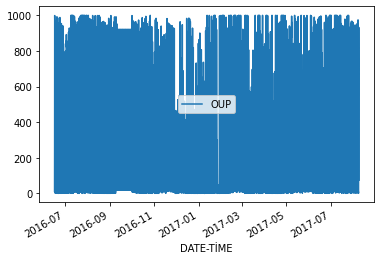

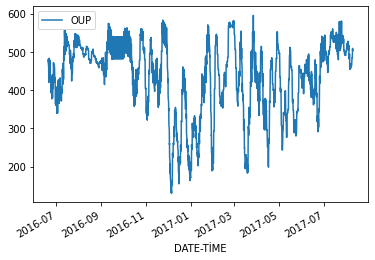

In [100]:
df_mean = df.rolling(window=60).mean()
df.plot()
df_mean.plot()

In [101]:
value = pd.DataFrame(series_value)

In [102]:
df1 = pd.concat([value, value.shift(1)],axis=1)

In [103]:
df1.head()

,0,0
0,11.606175,NaN
1,68.981872,11.606175
2,258.166154,68.981872
3,469.024487,258.166154
4,653.203425,469.024487


In [104]:
df1.columns = ['Real','Forcasted']

In [105]:
df1.head()

,Real,Forcasted
0,11.606175,NaN
1,68.981872,11.606175
2,258.166154,68.981872
3,469.024487,258.166154
4,653.203425,469.024487


In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [107]:
df_test = df1[1:]
df_test.tail()

,Real,Forcasted
5635,877.020000,927.75
5636,731.880000,877.02
5637,459.750000,731.88
5638,104.490000,459.75
5639,74.062216,104.49


In [108]:
df_error = mean_squared_error(df_test.Real,df_test.Forcasted)
df_error

31078.758647571907

In [109]:
np.sqrt(df_error)

176.29168626901244

In [111]:
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
#ARIMA - Autoregressive (p) Integrated (d) Moving Average(q)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


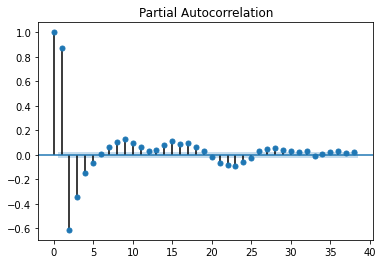

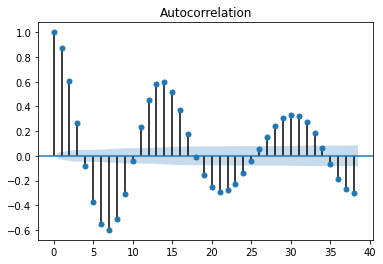

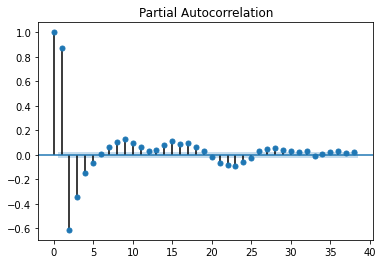

In [112]:
plot_acf(df)
plot_pacf(df)

In [114]:
df.size

5640

In [124]:
df1_train = df[0:4000]
df1_test = df[4000:5640]

In [130]:
df1_model = ARIMA(df1_train, order=(5,1,5))
df1_model_fit = df1_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

In [131]:
df1_model_fit.aic

49789.60767276675

In [132]:
df1_forecast = df1_model_fit.forecast(steps=1640)
df1_forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


4000    216.869619
4001    251.496176
4002    290.087321
4003    339.202934
4004    382.937669
           ...    
5635    323.779790
5636    323.779790
5637    323.779790
5638    323.779790
5639    323.779790
Name: predicted_mean, Length: 1640, dtype: float64

In [133]:
df1_test

,OUP
DATE-TİME,
2017-04-21 19:00:00,63.006000
2017-04-21 20:00:00,6.325000
2017-04-22 06:00:00,1.453000
2017-04-22 07:00:00,41.370000
2017-04-22 08:00:00,160.632000
...,...
2017-08-08 15:00:00,877.020000
2017-08-08 16:00:00,731.880000
2017-08-08 17:00:00,459.750000


In [134]:
np.sqrt(mean_squared_error(df1_test,df1_forecast))

367.46270362149846